In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#make array from Given data 
X = np.array([[2, 5], [5, 8], [7, 5],[1, 2], [4, 9]])
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(5, 2)


In [ ]:
centroids = np.array([[5, 8],[1, 2]])

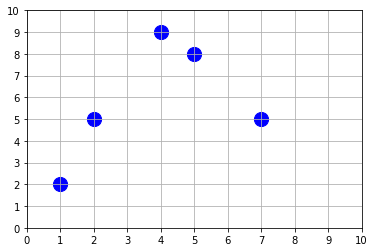

In [ ]:
plt.scatter(X[ : , 0], X[ :, 1],s=200,c='b')
# plt.scatter(centroids[0,0], centroids[0,1], s=200, c='g', marker='s')
# plt.scatter(centroids[1,0], centroids[1,1], s=200, c='r', marker='s')
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 11, step=1))
plt.grid()
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=2,n_init=1,max_iter=300,random_state=24,init=centroids,verbose=1)

In [ ]:
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 25.0
Iteration 1, inertia 18.333333333333332
Converged at iteration 1: strict convergence.


KMeans(init=array([[5, 8],
       [1, 2]]), n_clusters=2, n_init=1,
       random_state=24, verbose=1)

In [ ]:
kmeans.inertia_

18.333333333333332

In [ ]:
kmeans.labels_

array([1, 0, 0, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_


array([[5.33333333, 7.33333333],
       [1.5       , 3.5       ]])

In [ ]:
print(kmeans.cluster_centers_.shape)

(2, 2)


In [ ]:
kmeans.n_iter_

2

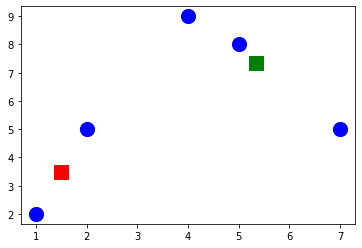

In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =200,c='b')
plt.scatter(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], s=200, c='g', marker='s')
plt.scatter(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], s=200, c='r', marker='s')
plt.show()

In [ ]:
centroids = np.array([[5, 8],[1, 2]])

In [ ]:
from sklearn.cluster import KMeans
wcss = []  
for i in range(1, 6): 
  kmeans = KMeans(n_clusters = i, init = 'random', random_state = 24)
  kmeans.fit(X) 
  wcss.append(kmeans.inertia_)

In [ ]:
print(wcss)

[53.60000000000001, 18.333333333333332, 6.0, 1.0, 0.0]


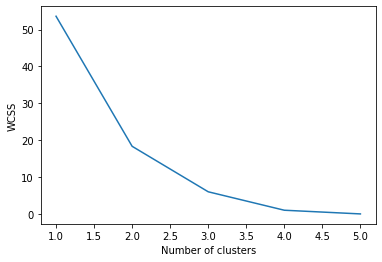

In [ ]:
plt.plot(range(1, 6), wcss) 
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS') 
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouttescore=[]
for i in range(2,5):
  kmeans = KMeans(n_clusters=i, random_state=24).fit_predict(X)
  silhouttescore.append(silhouette_score(X,kmeans))

In [ ]:
print(silhouttescore)

[0.43277015262694196, 0.42555854754515376, 0.2583079927413588]


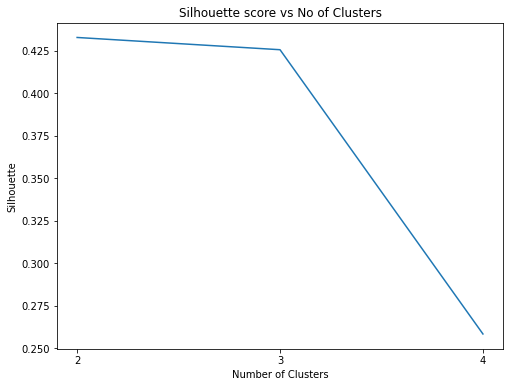

In [ ]:
x = [2,3,4]
plt.figure(figsize = (8,6))
plt.plot(x, silhouttescore)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')
plt.xticks([2,3,4])
plt.title("Silhouette score vs No of Clusters")
plt.show()

In [ ]:
X = np.array([[2, 5], [5, 8], [7, 5],[1, 2], [4, 9]])

In [ ]:
centroids = np.array([[5, 8],[1, 2]])

In [ ]:
# XSumSquare = np.sum(np.square(X),axis=1);
# CSumSquare = np.sum(np.square(centroids),axis=1);
# mul = np.dot(x, y.T);
# dists = np.sqrt(abs(xSumSquare[:, np.newaxis] + ySumSquare-2*mul))

dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
print(dist.shape)
dist[:5,:]
print(dist)


(5, 1)
[[4.24264069]
 [0.        ]
 [3.60555128]
 [7.21110255]
 [1.41421356]]


In [ ]:
dist = np.append(dist,np.linalg.norm(X - centroids[1,:],axis=1).reshape(-1,1),axis=1)
dist[:5,:]
print(dist)

[[4.24264069 3.16227766]
 [0.         7.21110255]
 [3.60555128 6.70820393]
 [7.21110255 0.        ]
 [1.41421356 7.61577311]]


In [ ]:
cluster_idx = np.argmin(dist, axis=1)
print(cluster_idx)

[1 0 0 1 0]


In [ ]:
new_centers = np.empty(centroids.shape)
for i in range(2):
  new_centers[i] = np.mean(X[cluster_idx == i], axis = 0)
print(new_centers)

[[5.33333333 7.33333333]
 [1.5        3.5       ]]


In [ ]:
loss = 0.0
N, D = X.shape
for i in range(N):
  loss = loss + np.square(dist[i][cluster_idx[i]])
print(loss)

25.0


#CALCULATIONS

In [ ]:
X = np.array([[2, 5], [5, 8], [7, 5],[1, 2], [4, 9]])

In [ ]:
centroids = np.array([[5, 8],[1, 2]])

In [ ]:
A1_C1_dist=np.sqrt((X[0,0]-centroids[0,0])**2+(X[0,1]-centroids[0,1])**2)
A1_C2_dist=np.sqrt((X[0,0]-centroids[1,0])**2+(X[0,1]-centroids[1,1])**2)

In [ ]:
print("A1_C1 Euclidean Distance= ",A1_C1_dist)

A1_C1 Euclidean Distance=  4.242640687119285


In [ ]:
print("A1_C12Euclidean Distance= ",A1_C2_dist)

A1_C12Euclidean Distance=  3.1622776601683795


#A1 belongs to C2 cluster as A1 Euclidean distance  to C2 < C1

In [ ]:
A2_C1_dist=np.sqrt((X[1,0]-centroids[0,0])**2+(X[1,1]-centroids[0,1])**2)
A2_C2_dist=np.sqrt((X[1,0]-centroids[1,0])**2+(X[1,1]-centroids[1,1])**2)

In [ ]:
print("A2_C1 Euclidean Distance= ",A2_C1_dist)

A2_C1 Euclidean Distance=  0.0


In [ ]:
print("A2_C2 Euclidean Distance= ",A2_C2_dist)

A2_C2 Euclidean Distance=  7.211102550927978


#A2 belongs to C1 cluster as A2 Euclidean distance  to C1 < C2

In [ ]:
A3_C1_dist=np.sqrt((X[2,0]-centroids[0,0])**2+(X[2,1]-centroids[0,1])**2)
A3_C2_dist=np.sqrt((X[2,0]-centroids[1,0])**2+(X[2,1]-centroids[1,1])**2)

In [ ]:
print("A3_C1 Euclidean Distance= ",A3_C1_dist)

A3_C1 Euclidean Distance=  3.605551275463989


In [ ]:
print("A3_C2 Euclidean Distance= ",A3_C2_dist)

A3_C2 Euclidean Distance=  6.708203932499369


#A3 belongs to C1 cluster as A3 Euclidean distance  to C1 < C2

In [ ]:
A4_C1_dist=np.sqrt((X[3,0]-centroids[0,0])**2+(X[3,1]-centroids[0,1])**2)
A4_C2_dist=np.sqrt((X[3,0]-centroids[1,0])**2+(X[3,1]-centroids[1,1])**2)

In [ ]:
print("A4_C1 Euclidean Distance= ",A4_C1_dist)

A4_C1 Euclidean Distance=  7.211102550927978


In [ ]:
print("A4_C 2Euclidean Distance= ",A4_C2_dist)

A4_C 2Euclidean Distance=  0.0


#A4 belongs to C2 cluster as A4 Euclidean distance  to C2 < C1

In [ ]:
A5_C1_dist=np.sqrt((X[4,0]-centroids[0,0])**2+(X[4,1]-centroids[0,1])**2)
A5_C2_dist=np.sqrt((X[4,0]-centroids[1,0])**2+(X[4,1]-centroids[1,1])**2)

In [ ]:
print("A5_C1 Euclidean Distance= ",A5_C1_dist)

A5_C1 Euclidean Distance=  1.4142135623730951


In [ ]:
print("A5_C2 Euclidean Distance= ",A5_C2_dist)

A5_C2 Euclidean Distance=  7.615773105863909


#A5 belongs to C1 cluster as A5 Euclidean distance  to C1 < C2

#NEW CENTROID FOR CLUSTER1

In [ ]:
newarr = X[np.array([1, 2, 4 ])]
print(newarr)

[[5 8]
 [7 5]
 [4 9]]


In [ ]:
new_c1=np.mean(newarr,axis=0)
print(new_c1)

[5.33333333 7.33333333]


#NEW CENTROID FOR CLUSTER2

In [ ]:
newarr = X[np.array([0,3])]
print(newarr)

[[2 5]
 [1 2]]


In [ ]:
new_c2=np.mean(newarr,axis=0)
print(new_c2)

[1.5 3.5]


#plotting

In [ ]:
x=X[:,0]
y=X[:,1]
text=['A1','A2','A3','A4','A5']

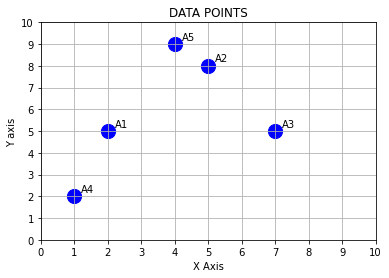

In [ ]:

plt.scatter(x, y,s=200,c='b')
# plt.scatter(centroids[0,0], centroids[0,1], s=200, c='g', marker='s')
# plt.scatter(centroids[1,0], centroids[1,1], s=200, c='r', marker='s')
for i in range(len(x)):
    plt.annotate(text[i], (x[i]+0.2, y[i] + 0.2))
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 11, step=1))
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.grid()
plt.title('DATA POINTS')
plt.show()

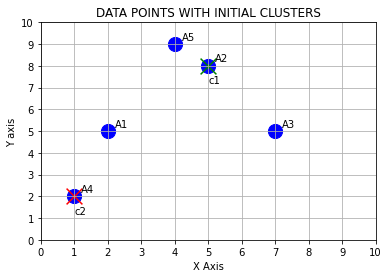

In [ ]:
plt.scatter(X[ : , 0], X[ :, 1],s=200,c='b')
plt.scatter(centroids[0,0], centroids[0,1], s=250, c='g', marker='x')
plt.annotate("c1",(centroids[0,0],centroids[0,1]-0.8))
plt.scatter(centroids[1,0], centroids[1,1], s=250, c='r', marker='x')
plt.annotate("c2",(centroids[1,0],centroids[1,1]-0.8))
for i in range(len(x)):
    plt.annotate(text[i], (x[i]+0.2, y[i] + 0.2))
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 11, step=1))
plt.grid()
plt.title('DATA POINTS WITH INITIAL CLUSTERS')
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.show()

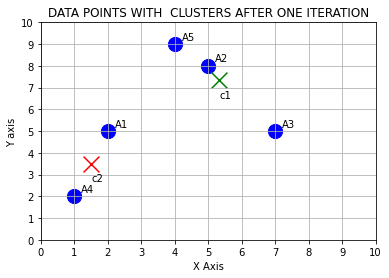

In [ ]:
plt.scatter(X[ : , 0], X[ :, 1],s=200,c='b')
plt.scatter(new_centers[0,0], new_centers[0,1], s=250, c='g', marker='x')
plt.annotate("c1",(new_centers[0,0],new_centers[0,1]-0.8))
plt.scatter(new_centers[1,0], new_centers[1,1], s=250, c='r', marker='x')
plt.annotate("c2",(new_centers[1,0],new_centers[1,1]-0.8))
for i in range(len(x)):
    plt.annotate(text[i], (x[i]+0.2, y[i] + 0.2))
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 11, step=1))
plt.grid()
plt.title('DATA POINTS WITH  CLUSTERS AFTER ONE ITERATION')
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.show()

In [ ]:
centroids = np.array([[5, 8],[1, 2]])

In [ ]:
from sklearn.cluster import KMeans
wcss = []  
for i in range(1, 6): 
  kmeans = KMeans(n_clusters = i, init = 'random', random_state = 24)
  kmeans.fit(X) 
  wcss.append(kmeans.inertia_)

In [ ]:
print(wcss)

[53.60000000000001, 18.333333333333332, 6.0, 1.0, 0.0]


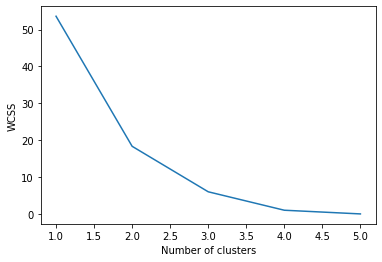

In [ ]:
plt.plot(range(1, 6), wcss) 
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS') 
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouttescore=[]
for i in range(2,5):
  kmeans = KMeans(n_clusters=i, random_state=24).fit_predict(X)
  silhouttescore.append(silhouette_score(X,kmeans))

In [ ]:
print(silhouttescore)

[0.43277015262694196, 0.42555854754515376, 0.2583079927413588]


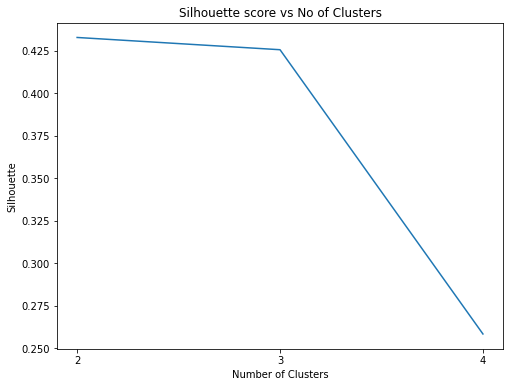

In [ ]:
x = [2,3,4]
plt.figure(figsize = (8,6))
plt.plot(x, silhouttescore)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')
plt.xticks([2,3,4])
plt.title("Silhouette score vs No of Clusters")
plt.show()